In [1]:
import requests
from bs4 import BeautifulSoup
import pickle
#!pip3 install lxml
#!pip3 install lyricsgenius
#!pip3 install vaderSentiment

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import lyricsgenius

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
#!pip3 install texthero

In [26]:
import texthero as hero

In [4]:
#!pip3 install clean-text
#!pip3 install scrubadub

In [6]:
#pulling in lyrics from genius
genius = lyricsgenius.Genius("16-D7-hIQRW2zcU90_Y2CMTmiwjIbYI5nFkQBwQn-FmfebVGWbD36FT1JpNBQgFh")
genius.remove_section_headers = True

In [7]:
#checking for lyrics
Lecrae = genius.search_artist("Lecrae", sort="popularity")

Searching for songs by Lecrae...

Song 1: "I’ll Find You"
Song 2: "Blessings"
Song 3: "All I Need Is You"
Song 4: "Church Clothes"
Song 5: "Cry for You"
Song 6: "I’m Turnt"
Song 7: "Whatchu Mean"
Song 8: "Nuthin’"
Song 9: "Hammer Time"
Song 10: "Say I Won’t"
Song 11: "Fear"
Song 12: "Welcome to America"
Song 13: "Facts"
Song 14: "The Fever"
Song 15: "Broke"
Song 16: "Drown"
Song 17: "Set Me Free"
Song 18: "Good, Bad, Ugly"
Song 19: "8:28"
Song 20: "Deep End"
Song 21: "Misconceptions 3"
Song 22: "Tell The World"
Song 23: "Round of Applause"
Song 24: "Boasting"
Song 25: "Gangland"
Song 26: "Broken"
Song 27: "Timepiece"
Song 28: "Dirty Water"
Song 29: "Worth It"
Song 30: "Can’t Stop Me Now (Destination)"
Song 31: "Mayday"
Song 32: "Don’t Waste Your Life"
Song 33: "Outsiders"
Song 34: "Sidelines"
Song 35: "Runners"
Song 36: "Co-Sign Pt. 2"
Song 37: "Always Knew"
Song 38: "Just Like You"
Song 39: "Deja Vu"
Song 40: "Background"
Song 41: "Freedom"
Song 42: "River of Jordan"
Song 43: "If I Di

In [8]:
#running sentiment scores through lyrics
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<251} {}".format(sentence, str(score)))
    return score

In [9]:
#printing all lyrics with for loop to inlude sent. score.
import pandas as pd

results = []
title_counter = 0

# Loop through and append Artist name, Song Title, Song Lyrics, and Sentiment polarity scores
# to empty list
for song in Lecrae.songs:
    results.append(
                    {'Artist':'Lecrae',
                    'Title':str(Lecrae.songs[title_counter]), # need to convert title to string to be written into JSON
                    'Lyrics':song.lyrics,
                    'Score':sentiment_analyzer_scores(song.lyrics),
                    #'Date': 
                    }
                    )
    title_counter = title_counter + 1

/Users/hannahkaplan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Just fight a little longer, my friend
It's all worth it in the end
But when you got nobody to turn to
Just hold on and I'll find you
I'll find you
I'll find you
Just hold on and I'll find you

I'm hangin' on by a thread
And all I'm clingin' to is prayers
And every breath is like a battle
I feel like I ain't come prepared
And death's knockin' on the front door
Pain's creepin' through the back
Fear's crawlin' through the windows
Waitin' for 'em to attack
They say "Don't get bitter, get better."
I'm workin' on switchin' them letters
But tell God I'ma need a whole lotta hope keepin' it together
I'm smilin' in everyone's face
I'm cryin' whenever they leave the room
They don't know the battle I face
They don't understand what I'm goin' through
The world tryna play with my soul
I'm just tryna find where to go
I'm tryna remember the way
I'm tryna get back to my home
But I can't do this on my own
That's why I'm just trustin' in You
'Cause I don't know where else to go
And I don't know what else

Go Grizz'
Winners Circle

Whatchu mean? Now, whatchu mean? (whatchu mean?)
I could never slack up, back up on my dream
All these rings got me feelin' like Hakeem
Bustin' moves, had to hit 'em with the screens
Jump away (move away), that's extreme (oh)
See us mobbin', 116 (oh)
Ain't no way I'll ever let you in between
'Cause whatchu sayin' whatchu mean ain't whatchu mean

I was always Pippen with the flow
I support the Greatest, give-and-go
Tried to hit me with the bad vibes, let 'em know
Shake that dust up off my feet before they hit the floor
Focus on the ones I love, yeah, them my folks
People love to talk the talk, but they don't really know
Catch me outside on the field, that's the goal
Goin' for conversion, extra points on the low
All I know is come up winter to the summer
Work on top of work, you know we did a ton of
Movin' lowkey like we diggin' tunnels
Haters, I don't see you, on my Stevie Wonder
Guess it's safe to say I stay in my lane
Always on time, never hesitate
Watch the 

Peace does not come before salvation and salvation does not come without truth

I will only tell the truth
I will only tell the truth
Incoming!
Truth, truth, truth, truth
Truth, truth, truth, truth, truth

People wonder, "Is he woke or just a new slave?"
Old religion, he just covered it with new chains
Choppin' out the church, he ain't real, he fake
He divisive, he don't rep the King, he just want the fame
Aw man, now they actin' like I'm suddenly political
Told me shut my mouth and get my checks from Evangelicals
Boy, my momma raised me, on Angela and Eldridge
Chuck Berry made it, but the credit went to Elvis
Know you never knew that, know you think I'm too black
I just think I'm too real, I grew up on 2Pac
You grew up thinkin' that the Panthers was some terrorists
I grew up hearin' how they fed my momma eggs and grits
"'Crae, they say you should follow in the steps of King"
I say, "You've forgotten how they shot him in the streets"
I ain't really changed, it's the same old rebel
Stil

It's gon' all work out sooner than later
You don't have to worry 'bout tomorrow
It's gon' work out in your favor
Just keep your head to the sky
Keep your eyes on the prize
Just keep your head to the sky
Keep your eyes on the prize

Man, I'm insecure and I'm so unsure
My motives don't be the purest either, my little sister
Prolly need me, I ain't been around, and I ain't tried to lead her, ugh!
Help me, Lord, I ain't ever have no daddy
Feel like a failin' father tryna raise my family
I've seen cancer take my lady's pops and he fought so hard
And we cried so hard, but sometimes life's so dark
But he told me, "Boy, you keep yo' head up, never let up, and never give up, and don't cry for me 'cause I'ma live up in the sky"
Let it all work out, that pain gon' make you stronger
That hurt gon' make you a leader, don't make that make you a monster
In the middle of the darkest heart is heartless tarnished carnage
The Master Artist makes your mess a masterpiece regardless

It's gon' all work out 

We not playin' out here, it's for real. We livin' out here for life, we tryna to get it. Ain't nobody finna take our life. I keep my young homies out here with these things, my big homies keep handlin' me. And we keep it crackin'. My other name should've been Jesse James 'cause I stay with my cannon didn't have no choice, I was raised right around the corner from where we standin'. Hollow points in it and all of that, I'm ready. We gang bangin'!

My cousin *beep* was a killer
He done pulled a lot of triggers
He done made a lot of mamas cry
And if you ask him why he do it he'd just say, "I'm young and foolish"
Bang on you right before he made them bullets fly

He ain't have no sense of dignity, his daddy was a mystery
He'll probably end up dead or sittin' in a penitentiary
And tell the judge he can go to hell for the sentence
And it probably make no sense to you but listen to the history
The new Jim Crow or the old one
People out here fightin' for equality and honestly I think they owed

Awakened from my slumber by the thunder, lightning clapping
Raining on my window pane and praying I make something happen
A preacher's prophecies never bothered me when I was younger
Sitting on my Grandma's lap, as she cried I often wondered
What was her tears for? Could it be for my grandfather?
Or maybe she felt for me cause I'll see more of those cold tomorrows
Then she see the world will up and turn on me
Cause the morals that she often spoke were meant for 1923
I fall asleep off in her arms, a Psalm was spoken
The Lord is surely my shepherd, he lead me to the water
Thought that often stuck with me
Amongst the wolves that run the streets
Out here paying dues to lose
I pray your angels come for me
A non-believer I never have or could be
Lord give me time to peep the signs I should see
Sipping got me feeling like a player riding clean
Bending corners hoping I might find my saviour on the curb
I rarely go to Church
False prophets rocking Prada so I rarely feel the word
Jezebels lurkin

Yeah, this right here is dedicated to my family, my friends, my lady, everybody that helped me down through the highs and lows. Especially the Lord, you know what I mean? You held a bright light in my life, you feel me?
Shine a light on me
You shine a light on me
You shine a light on me
You shine a light on me
Yeah, ayy
Shine a light on me

Learned a lot over these last few years
Industry people ain't friends, just peers
I learned that these girls easy like the morning of a Sunday
They don't love you 'til you gone like Harambe
Still killin' over colors, now it's black and blue
We dyin' every day, B, we just don't make the news
When you speak out for your race, just watch
They gon' twist and say you hate these cops
I'ma take these shots
How can he love Jesus, Kanye, and K-Dot?
Martin, Malcolm, and Schaeffer, Mitsubishi, and Maybach?
Contradictory, nah, it's complimentary
Understanding me ain't for the simple and elementary, oh

I know this might go over some heads
But I come from being 

(And they say) You only live once so live it up tonight
I hope we live twice cause I can't wait to give up this life
Don't get me wrong I love my fam and my experience
Been around the world and back seven wonders I done seen 'em
Number eight is just us wondering what happens when we perish
And I don't want no regrets I'mma tell the ones I cherish
That I love 'em thinking of 'em on this red eye flight to Paris
If I die before I wake at my wake please tell my parents
That your son will positively wake in paradise
Life is like a pair of dice so watch the ones you rolling with
Roll a clip of my life you gon' see a bunch of empty bottles
Broken hearts and blurry nights, Facebook likes and twitter follows
Im not living for today cause tomorrows looking pleasant
And the future is a gift even though this is the present
Yea I do believe in heaven but my actions ain't the key
Them gates remain locked if everything fall on me

So let ‘em know that when I come to the end of my road
And they ask me

Running, running ‘til the fear is gone, don’t know where I’m going
Don’t know if I’ll make it home, tell Mama I’m sorry
I know that I’ve made mistakes, tell her it ain’t easy
I’ll see her on judgment day
I lost my way, I lost my way
I lost my way, I lost my way
I lost my way, I lost my way
I lost my way, I lost my way

And tell the pastor to pray for me, I’m gone
Ayy look, tell my mom and my partners who knew me since I was younger
I’m ‘bout to sell out for fame and a couple dollars
Probably seen me on TV, standing with girls in bikinis
Bragging on money and things that I had to borrow
They knew it, I blew it, fame and fortune got to me
Keeping it real will keep you broke, I’m out here looking for glue
You wanted real hip-hop, I’m sorry
‘Cause this VIP is free and all these girls want to party
So, super producer, pop singer, plus the yola
Now they got my record spinning, trying to sell you cola
Ah man, what happened? I started moving too fast
Traded the craft for the cash so now you do

I'm riding round and I’m getting’ it; they riding round pretendin’
I been had it, I been done, I promise that it's all empty
They say they ridin’ Bugatti's, man
Put some babies through college
Quit tryna’ act like the trap is cool
‘Cause we tired hearin’ that garbage
Hey, bags of white, pints of lean
I been on dope boys since a teen
But this ain't what we meant to be
And y'all don't make no sense to me
You pump fakin’, ain't shootin’, ain't killin, ain't doin’
Half them thangs you say you doin’, but 116 we stay true an’
Ain't dope dealin’, ain't Po pimpin’, talkin’ ‘bout my own folk killin’
We on that Jesus soul healin’, so serious, gorillas
Wild ain’t we, can't tame us, been changed, can’t change us
1:16 – You can’t shame us. Live that truth; you can't blame us

I heard him say he bought the block (Fakin!)
In his song he say he gansta’ but he not (Fakin!)
Say he makin’ money, cashin’ big checks (Fakin!)
While his chain leavin’ green on his neck (Fakin!)
I’m not impressed
So I guess th

Who’s got the power?
(Derek Minor inhales)

The key to life: money, power, respect
Louie this, Gucci that, two private jets
Big money, big business, watch that paper stack
Treat life like a game, it ain't pool but I'm racked
Up, big bucks, no whammies
I swear I prolly lump somebody head for a Grammy
My heart black as the Lambo Kim bought for Kanye
And I ain't frontin', I'm just telling y'all what God say
Blood thirsty
Seek my own will since the day that Adam cursed me
The lust for power go to ya’ brain if you let it
You say, “What up, dog?” I hear “God.” I'm so dyslexic
Sit on the throne, it's really a toilet, heart is septic
I have no power, I get handed death, I must accept it
It's hard to see the light when you never listen
Our whole life’s blacked out, the power's trippin'

Who’s got the power?
(Do you really want it all, whole world in ya’ palm, tell me...)
Who’s got the power?
(It’ll make you a leader or a tyrant, you do the decidin’)
Who’s got the power?
(Do you really want it a

It's like
It's like the Devil tryna scare you
But then the angels come in, and the angels
They let you know who's in charge
(Oh-oh, oh-oh, oh-oh, oh-oh-oh)
(Oh-oh, oh-oh, oh-oh, oh-oh-oh)

I tried living apart from God
At times I was feeling so far from God
My faith in His people done left me scarred
The hatred and hurt was so bizarre
I thought that they would always ride for me
I cried, but nobody replied to me
I questioned the truth inside of me
And right about then is when the Devil had lied to mе
Like, hold up, God got you? He don't evеr show up
All His people acting like they know you
Tell you that you do it for the money, fame, power, tryna blow up
Why you playin' games? Time to grow up
You've been reading Bibles and leading studies and helping your little buddies
But tell me what it's really doin' for ya
They gon' still tell you're fake and phony, assuming your every motive
So what's the point of tryna keep it loyal?
Said you had fake faith, you're starting to race bait
Can't ev

Yeah
Just wanna dive into the beat
Swim around in it
Let's rebel

Rebel, I'm in rebellion
Yeah, to all my Rebels out there
Rebel, I'm in rebellion
Rebelling against the culture, being transformed
Rebel, I'm in rebellion
Not conformed to the ways of this world, or this age
Rebel, I'm in rebellion
Welcome to the Rebelution

Jesus was a rebel (He was), a renegade outlaw
Sanctified trouble maker, but he never sinned, naw
And he lived his life by a different set of rules
The culture ain't approve so you know they had to bruise Him
That's the way they do, man they swear they so gangsta
Everyone the same, everybody do the same stuff
Tattoos, piercings, smoking up and drinking
Money and sex, plus them extravagant weekends
Man if that's the high life I'll puff puff pass that
You live evaporated like missing a gas cap
I guess I'm past that, I'm in rebellion
Rather have a dollar in my pocket than a million
I'm scared to worship money and my wants over Elyon
I remain a rebel while the rest of them

Alright, alright, welcome to the label, man
Now check this out, man, listen. I know you’re known for just being honest and transparent and all that good stuff
But listen, we ain’t got no time for all that, man
That don’t make no money
We need you to tell lies, lies, and more lies, man
It’s all about selling out
Don’t give the people what they need, give ‘em what they want, baby
Lie to these folks, man!

I’m on now, I can’t even stand me
Look at me, Mama, I’m known now, I got me a Grammy
Call Kami, Khiana, and Tammy, and tell ‘em that I made it
Broke my heart in the seventh grade, so this is how I repay ‘em
They say that money can’t make you, they probably ain’t making money
It made me richer than you, and it made me look at you funny
You don’t really want it, you don’t want no problems, problems
Goons be like, “Whatever you need, dawg, call me.”
So I be like doo-doo-doo-doo-doo-doo-doo-doo, "Solve it."
Money on his head, I put that boy under the water
I can’t even rap like that, but in

Look, I’m all in it
Preach Jesus till I’m short-winded
Come God-sippin' pouring up living water in lyrics
This ain’t rap this bartending
And I’m back in the back snapback to the back
With a pack full of cats that’ll strap with the fact
Christ when he ask to revive in the tracks
Turn their life into maps with the gospel we pack
Look I’m of one life
But for Him I spend every cent though
I know this life it comes with pain
But it’s through our pain we win doe
Could be made like Him so
Treat these streets like flint bro
Cause our God can spark up the dark
In the hearts of the hardest departed let’s go

Treat every night like it’s the last night
Like it’s the last time you get no other chances
Get your torches high let’s set ablaze the sky
Passions are fire bright and we’ll be burning forever
(Light up the night) Set the world on fire, let’s set the world on fire (4x)

Never been here before
Left foot tell the right foot to go
See the whole world coming through the door
Footloose don’t nobo

Go hard (go hard)
Or go home (go home)
Go hard (go hard)
Or go home (go home)
Go hard (go hard)
Or go home (go home)
Go hard (go hard)
Or go home (go home)
Go hard (go hard)
Or go home (go home)
Go hard (go hard)
Or go home (go home)
Go hard (go hard)
Or go home (go home)
Go hard (go hard)
Or go home (go home)

Go hard (go hard)
Or go home (go home)
Go hard (go hard)
Or go home (go home)
Lord, use me (Lord, use me)
Lord, use me (Lord, use me)
Lord, use me (Lord, use me)
Lord, use me (Lord, use me)
Lord, kill me If I don't preach the gospel
I'm still in my twenties, but I'll die if I got to
Eh man, I'm already dead, man, forget my flesh
I done been crossed over, see the full court press
I'm a full court mess if the Lord don't use me
Running from my trials thinkin' everything's groovy
If the cross don't move me then I don't wanna breath no more
If I ain't seeing Christ, partner, I don't wanna see no more
Rep Him every day without worrying about a bruising
I been to China, man, I seen som

Ridin' with my top down listenin' to this Jesus muzik

Yeah, back on the grind again
I know it’s been a little while, but it’s time again
Folks askin', "'Crae, when you gon' rhyme again?"
I’m like, "Hold up, give me time, my man"
See a lot of things change, some stay the same
Went from H-Town to D-Town to Memphis, man
One thing is for sure, everywhere I go
People caught up in their self, money, cars, and clothes, yeah
They talk about it all the time and put it in they songs
They drive around and play it loud like it ain’t nothin’ wrong
And all they talk about is sinful stuff
Got everybody actin' bad, thinkin' that they a thug
And they tryna drown me out
But, nah, they ain’t gon' count me out
I got a back pack full of tracts, plus I keep a Johnny Mac so we can pound it out
Plus I’m bumpin' these Jesus beats
Whenever they seein' me
People lookin' all confused 'cause every one of my tunes is screamin' Jesus peeps
I was bumpin' that Trip Lee
BJ rollin' with me
Both our heads noddin' like w

Girl I love you
Cross my heart and hope to live
To make you
Smile
Cause I don't deserve you
For all the times you held me
Down
Listen to me now, I love you girl

You know I had to do a love song
And let the whole world know bout my love y'all
Love sick is what I told the
Doctor
We could be more like Sho Baraka
But we are Moore's and we been that
And when I said I do, I meant that
It's a trip that you let me lead you
Cause I’m a mess and sometimes I need you
And I need you, to understand
That
(I'm dying everyday trying to be a better man)
I put that on my momma
I love the way you play your part through my drama
Long nights, long flights
Trips out of town
You keep my head up when it was hanging down
Down like four flats on a lack
I let you down and you still keep coming back

Out here trying to save the world
Can't forget about my baby girl
And baby girl, you so tight it's true to me
Sometimes I wonder why you fool
With me
Cause foolishly I’m prone to hurt you
Call you grace cause I don’

(We so impressed)
With them ladies
Who be drivin' Mercedes
Who be drivin' them crazy
And we gotta be crazy
(We so impressed)
With them fellas
Who be makin' them jealous
Who be makin' them stellas
And we gotta be crazy
(I'm so impressed)
King who on the throne
Who left his heavenly home
Never did a thing wrong
They crucified him on
A tree, there he made
It was crazy how it set the stage
For his resurrection from the grave
That gets me amazed
(You can be) the flyest man
(With a) hundred grand in your hand
Swag right, sag tight
And a Gucci fan
(You can) be the richest, be the smartest, be the hardest, all of that
But I guarantee before I die they all are fallin' flat
Used to want a lotta things
All the stuff that's on TV
Education, cars, and clothes
Fashion lights and jewelry
(Focused on the wrong stuff)
Now I got my eyes on you
And now I know that
God is enough-nough
God is enough-nough
God is enough-nough
You are enough-nough
Never too much-uch
More than enough-nough
God is enough-nough

Oh yeah! (Oh yeah)
Here we go! (Here we go)
A little rough! (A little rough)
No sweat! (No sweat)
I can do it! (I can do it)
You can do it! (You can do it)
Ooorah! (Ooorah)
Left right...

Tell 'em bring their guns out
Send my city up in flames
And yea though I walk through the valley of the dead
But my hope still remains
Whether dead or alive, this is do or die
When Christ is the gain
So raise your torches up high
Tonight we fight for our King

I was Tailored to snatch the mic' Swiftly like Ye' did
And lay it down for the king like a sleigh bed
And they can kill us now, go get the yellow tape
Hey put me 6 feet in the ground and watch a great escape
I promise, ain't a 6 shooter that can keep me down
My God's so official, that's a technical foul
Was engineered in my mother's womb for Gods' glory
Plenty faith in the persecution is inventory
I been spit in the face, still exhibiting grace
Kicked out many a place, just for sharing my faith
My belt tight, shoes laced, plus a breastplate
My w

Kadosh—Old Testament
Hagios—New Testament
Inherently, the Word means to holy, we know in not holy in our own terms, but Christ Who loved makes us holy. So because we satisfied the wrath of God, the beef has been crushed, now we got a new identity, called a saint

Yup!
Hey, hey
Used to be where I could only trust me and myself
And in that heavy metal Devil that would send me straight to Hell wit' it
Thought it was no helping it
Selfishness was celibate
I'd sell a bit, but I'd make sure I don't sit up in that cell a bit
Yell a bit only when hurt came for certain
Illiterate, ain't know that the Word came
Then that Word hit me and unblinded me
Jesus paid a price for me
That's how I gained the right to be the son of God I'd like to be
Changed my heart, gave me a desire for His work, man
Kill me if you want, but I'm gon' get back out that dirt, man
Not yet what I'm gonna be, but not what I used to be
I bless His name forever Who would chose me and start using me
Used to love my sinning full 

I wake up, before I throw a beater on
Fall to my knees, thank the Lord for the new shalom
I–I wake up, before I throw a beater on
Fall to my knees, thank the Lord for the new shalom
I–I wake up, before I throw a beater on
Fall to my knees, thank the Lord for the new shalom
I–I wake up, I–I–I wake up, I–I tha-thank the Lord, tha-thank the Lord for shalo–shalom

Aye, I wake up before I throw a beater on
I thank the Lord for peace or you can say shalom
I’m on and I’m gone, out the door, I’m gon’ rep my home
New Jerusalem, yeah, you know where we belong
Got the Word in my heart, when the day start then the darkness wanna get us sparked up
So I keep a guard up, 'cause sin in me wanna get the best of me and have me all scarred up
And I know I’m marked up by the Spirit Who's still in me, fillin' me up with everything I need (okay)
Yeah, they got that cheese, but I don’t need a piece, I just need peace, please
This life ain’t easy, matter fact it's opposite
And I got the test results (what), I

A yo man let that beat drop on em
Yea, oh you know I'm liking that right there
Wats good yall
It's yo boy Lecrae
Some call me creezy
I'm here with my 116 clique representatives
We just want to put it down for the Lord Jesus Christ
City to city and state to state, we keep running into more 116 clique members
People who are unashamed of the gospel of Jesus Christ
Let me tell you where we're from dog…

New Jerusalem, that's my home
Let me put it in a song, so you'll never get it wrong
No shame in the message, that's the reason I live (reason I live)
Christ up in every song, He's the reason I'm here
All they rhyme about is guns, money, sex and drugs
Eighty percent of these dudes is fictional thugs
We don't kill nobody, we don't rob no stores
We don't trap, we ain't strapped, we don't smoke that dro
We ain't pimpin, we ain't trippin, if we tippin on some fours
Then you'll probably hear dat Jesus Muzik comin' out our doors (comin' out our doors)
We ain't ashamed, you can call us lame
But eve

I did it for you
I did it for you
I did it for you
That's why I did it y'all
For all the listeners
Whoever be hearing this
That's why I do what I do
I did it for you
I did it for you
I did it for you

Single mother low income riding the bus
Big momma making a fuss saying in God she trusts
My uncles 20, I'm 10 taking gulps of gin
He don't realize that we all are engulfed in sin
Gang bangers on the corner got me wanna be down
Take a bullet for some city on government ground
By 25 everybody locked or dead
Too busy playing around never looking ahead
Every funeral, cats get upset and cry
Turn their heads towards the sky trying to ask God why
But they never looked up till then
Every other day they concerned with the world and consumed in sin
Not Christ just heaven they want
They think clean means not trying to sling things out of their trunk
Nobody ever told'em heaven was spotless and we all dirty
That's why we need a Holy God to wash us
I did it for you
I opened up my life and shared my lif

You can find me in the Church
Focused and alert
New suit and tie
Jeans and a t-shirt
I'm into praising God
'Cause He made us out of dirt
And plus He gave His life
For this world's evil works
So flirt with that
Most of y'all can't jerk with that
Cause it ain't no benefits and no perks with that
Still gotta live your life on this earth with that
But we live eternally and I can work with that (holla)
Yeah I cheated, yeah I lust within
But guess what, that's why I trust in Him
See you thinking that you ain't that bad
You just lying to yourself playboy
You better check your health
While you all about the cash and ice
Hope you ready for change
You just broke the first commandment twice
And I know that you done stole before
If it wasn't a gun, it was some gum from the grocery store
It's all sin to God, man look into God
You guilty, you ain't even a friend to God
Sin gotta high price, it'll cost your life
But God fit that bill on the cross with Christ so
Crossover
From death to life
What's the

Ladies and gentlemen
I'd like to interrupt this album
With a little bit of real talk
We bout to represent the priesthood of believers
It's your boy Sho Biz and Lecrae
Yo let's do this dawg

It goes one for the Father, two for the Son
Three for the Spirit through Whom work is done
Before He cracks the sky and our feet leave the dirt
Let's go ahead and represent tha Church
Wake up in the morning, and I hit my knees early
Face to the floor, thinking I'm not worthy
I'll do that Luke 9 thing, gotta bear my cross
Team up with Lecrae, we gotta reach the lost
I'm getting pounds from the church saying, Sho you've grown
But don't get too proud, cause Sho is prone
To lie and conceit while the spirit lies in defeat
Gotta beat the flesh daily, cause dawg gotta eat
Cause God's wrath is something we all gotta meet
It don't matter if you Black, White, Jew or Greek
The only way to avoid the doom and despair is if
God asks Christ is He with you and He say (yeah)
But on the contreezy my neezy it may soun

Real talk
The word of God says that every man is appointed one time that he should die and then face judgment, think about it, where will you spend your eternity, up in heaven, or in hell?

They tell me Crae
Murk the track
Hurt the rap
Naw dawg
Let me pose a question to you
Have you heard of my Dad?
He purchased us back
Putting man's curse on His back
I worship for that
It's my whole purpose in fact
Purple and black
Is how He looked
I'm certain of that
And man I cry
When I think of how the curtain was cracked
But He rose in 3 days
That's a pertinent fact
And since He created and saved me
I serve Him for that
I read His Word all the time
So He stay on my mind
Flesh rise all the time
So I stay on the grind
When it's time to go to heaven
I don't pray I'm in line
I'm 100% positive
I'm waiting for mine
Ain't no if's, and's or but's
Who's or what's
You walking away from Christ man
You losing touch
Take away
You add some man
You doing too much
The world's feet rushing to evil
Pursuing their l

I know I'm not fit or deserving to do this
But I'm foolish
If I don't spit to give you Godly influence
Like a student
Practice and prudence will you walk with me through this
As I give my feeble attempt at glorifying Yeshua
Cause He
Is the beginning everything came into being
By His being the being who created all other beings
We're MCing
Due to His benevolent freeing, decreeing
He's the almighty creator of everything that we're seeing
There is none like Him
If you don't like Him then He'll use the liking of liking Himself to acquire just to delight Him
That's why I write Hymns
My right hand used to write sin, battlin' Tim like I was shai linne
And now despite sin
I give praise the God who made sunny days
To white lightening
It's quite frightening
To sing "Whose world is this" without proper enlightenment

He use intelligent design
Like eloquence confined
Life elements assigned by
Elohim my God
He left his fingerprints
You thinking that our origins are coincidence
Our symmetry alone ma

Yeah Yeah
A lot of people don't know what they believe in (what?)
I don't even know what they believe in
They probably full of doubts going bouts what they
Fear cheers hears to the ears you can count
Or the ones that you can't though
Unashamed of the faith that i bank on
Yeah i said it
Paid my debt on the cross good credit
Only one God: Father, Son, and the Sprit
Father made plans and His Son came and did that
Born of a virgin and died on a Pilate
Pilot: He don't need one but he still fly
Rose and did a reverse skydive
No lie, no lie, boy He coming back
I hope you on the scene before the sky crack
Im headed to party where the lights at
Holla at me I can I can be your sky captain

 is right
So let go and we'll have the time of our lives
Don't worry that part of your life
Have a good time
Everybody dance
Get up, get up, let me get get get get
Get up, get up let me put you on
Get up, get up, let me get get get get
Get up, get up let me put you on
Get up, get up, let me get get get get
Get

I know you never knew you pops much but you knew the block huh livin in a cruel world seein your daddy locked up no cards no letters never saw your graduation left you insecure and feelin like you was in agitation so you rebeled he don't want you you don't care tryna cover up the pain with the anger your stare theres a danger in the air you can smell it you can tell theres somethin wrong wit you you got the hurt and take it home wit you, you thought that you could drink or smoke it away, well maybe money take your problems and just throw them away, but you was wrong and you knew it all along feelin empty in your soul but you gotta let it go runnin and duckin cuz you know that you're wrong your soul ain't satisfied wit women wit T.I. songs and the three blocks on gotcha feelin trap ina lap to a of a life style you wanta leave and neva turn back (neva turn back)
Feels like nobody wants you (feels like nobody)
Feels like nobody loves you
You can't run no more (no more)
Something ain't rig

I appreciate the love when I rock the stage
But I don't do this for props and things
I'm nothing at all, it's Christ inside that
Got me spitting on the mic tonight
I appreciate the love when I rock the stage
But I don't do this for props and things
I'm nothing at all, it's Christ inside that
Got me spitting on the mic tonight

Ayo, I'll probably never be the type to spend two bucks on Von Dutch
But I wanna touch hearts to help the man up scene
I come to do what the Lord say
Got my lifestyle flipped to fit His forte
I'm up early, like moms and grits
Getting fed, daily bread, till my mind is Script
And my rhymes' intent
Is the point straight at the cross
Without using clever lines and hints
I know you'd probably be impressed if I cleverly used my melodies
To share Christ without using His name heavily
But I'd rather be
Saying His name so much, you could never get me confused or discredit me
Cause I don't wanna do this, I used to be a Judas
It's only Christ in me that got me tryin' to mak

Its the assurance of things hoped for. Noah built a boat for
Jesus took a beatin and his whole body was broke for
Spoke for. Through it we know who the Word was wrote for
Abraham had it, matter fact that's what he's known for
Faith, ya'll, through it we were saved by grace
If you got it, we can see it by the way you run the races
That means we can see it on your face
If the faith don't act, then it really ain't faith
And that really ain't the case cuz faith ain't fake
It'll have you try'na act out the Word everyday
Every Christian has faith, its a gift; we should use it
Some distort the veiw of it and others just abuse it
It can be irrational and make you give your life up
This is for the cause of Christ and not to get a nice truck
Righteous, when you know you gotta trust God
When it seems hard, man, faith is a must have
You gotta leap ya'll (Leap wit it!)
You gotta leap ya'll (Leap wit it!)
Take a leap of faith
You gotta leap ya'll (Leap wit it!)
Come on jump for me now
Jump for me no

(Okay if your  fails after launch, go to the standby and it will not effect your boost pack
Gemini 4, it will by 1:40 on my mind and we are not reading you very clearly)
It's going down, down, down
It's going down, down, down
Hey, I know you think you the one, homie
It's going down, down, down
It's going down, down, down
But can’t nobody escape gravity
(It's the Black Knight)

It's going down, down, down
Yes sir, it’s about to go down
It’s spiralin’ to the ground, but I don’t think it’s gon’ slow down
This fallen world is fallin’, this building’s ‘bout to blow down
We just goin’ in circles, we don’t get another go ‘round
What happens when your life is leveled, bro?
A storm is comin’, can’t nobody’s levees hold
It’s heavy, bro, but I gotta let you know
It’ll help you look beyond this world like a telescope
Yeah, stack your money in the air
‘Til it’s rainin’ hund’eds all around your atmosphere
You can build a mansion sky high
‘Til can’t nobody see the roof when they drive by
But death’ll

Oppan Gangnam style
4-fever, 9 millimeter
'Dem a want a heater ‘cause the streets is finna heat up
Six million ways to die, choose 10
And if he don't die then he probably do ‘em again
From passionate catastrophe to genocidal blasphemy
No respect for humanity, they resort to insanity
Head bang on the glass, call it window pain
Jumping out the window tryna get my frame through the frame
Close range, when he point, I just blank out
Felt my heart sank when that bang thang rang out
Now you got yo' thang out
You take life, you give it
You took his life away, but you gave yours up to system
No wanna listen, no reason for livin’
We bought the lie we can't be forgiven for all our sinnin’
Killin’ is the religion, service is in a prison
Ignorance got a slave and our name in the mentions

Oppan Gangnam style, oppan gangnam style
Oppan Gangnam style, oppan gangnam style
Oppan Gangnam style, oppan gangnam style
Oppan Gangnam style, oppan gangnam style
Bad man, bad man, gun man, bad man
Squeeze bulle

In [10]:
#checking to see if all songs were imported
title_counter

251

In [12]:
print(results)

[{'Artist': 'Lecrae', 'Title': '"I’ll Find You" by Lecrae:\n    Just fight a little longer, my friend\n    It\'s all worth it in the end\n    But when you got nobody to turn t...', 'Lyrics': 'Just fight a little longer, my friend\nIt\'s all worth it in the end\nBut when you got nobody to turn to\nJust hold on and I\'ll find you\nI\'ll find you\nI\'ll find you\nJust hold on and I\'ll find you\n\nI\'m hangin\' on by a thread\nAnd all I\'m clingin\' to is prayers\nAnd every breath is like a battle\nI feel like I ain\'t come prepared\nAnd death\'s knockin\' on the front door\nPain\'s creepin\' through the back\nFear\'s crawlin\' through the windows\nWaitin\' for \'em to attack\nThey say "Don\'t get bitter, get better."\nI\'m workin\' on switchin\' them letters\nBut tell God I\'ma need a whole lotta hope keepin\' it together\nI\'m smilin\' in everyone\'s face\nI\'m cryin\' whenever they leave the room\nThey don\'t know the battle I face\nThey don\'t understand what I\'m goin\' through\nThe 

In [23]:
artist = genius.search_artists("Lecrae")

In [14]:
#tryiing to find Lecrae ID number
#print(artist)
#artist = genius.search_artist("Lecrae")
#for song in artist.songs:
    #print(song.lyrics)

In [16]:
#looping through and saving all songs by Lecrae. 

#results1 = []

#title_counter = 0

# Loop through and append Artist name, Song Title, Song Lyrics, and Sentiment polarity scores
# to empty list
#for song in Lecrae.songs:
    #results1.append(
                    #{
                    #'Title':str(Lecrae.songs[title_counter]), # need to convert title to string to be written into JSON
                    #'Score':sentiment_analyzer_scores(song.lyrics)}
                    #)
    #title_counter = title_counter + 1


In [17]:
for song in Lecrae.songs:
    print(song)

"I’ll Find You" by Lecrae:
    Just fight a little longer, my friend
    It's all worth it in the end
    But when you got nobody to turn t...
"Blessings" by Lecrae:
    Ear Drummers
    Ooh, yeah
    Ooh, yeah
    
    If I ever took a loss, I learned a lesson
    I won't ever think I'm b...
"All I Need Is You" by Lecrae:
    All I need is you
    All I need is you
    
    Keep me in my timezone when my mind's gone
    When I'm flying home...
"Church Clothes" by Lecrae:
    Yeah, uh
    One time for H-Town
    One time for D-Town
    One time for A-Town, M-Town
    
    R.I.P. to Medgar Evers...
"Cry for You" by Lecrae:
    This thorn in my flesh
    Is the only thing I got left
    And it's so hard to confess
    When everybody think...
"I’m Turnt" by Lecrae:
    Check it
    Look at me I'm all the way turnt up
    I ain't smoking but my homie in here burnt up
    Yeah, I'm...
"Whatchu Mean" by Lecrae:
    Go Grizz'
    Winners Circle
    
    Whatchu mean? Now, whatchu mean? (whatc

In [36]:
len(results)

251

In [37]:
type(results[0])

dict

In [20]:
results[0].keys()

dict_keys(['Artist', 'Title', 'Lyrics', 'Score'])

In [21]:
for r in results:
    print(r.keys())

In [12]:
#checking data frame
df = pd.DataFrame.from_dict(results)
df

,Artist,Title,Lyrics,Score
0,Lecrae,"""I’ll Find You"" by Lecrae:\n Just fight a l...","Just fight a little longer, my friend\nIt's al...","{'neg': 0.091, 'neu': 0.765, 'pos': 0.144, 'co..."
1,Lecrae,"""Blessings"" by Lecrae:\n Ear Drummers\n ...","Ear Drummers\nOoh, yeah\nOoh, yeah\n\nIf I eve...","{'neg': 0.046, 'neu': 0.743, 'pos': 0.21, 'com..."
2,Lecrae,"""All I Need Is You"" by Lecrae:\n All I need...",All I need is you\nAll I need is you\n\nKeep m...,"{'neg': 0.059, 'neu': 0.849, 'pos': 0.092, 'co..."
3,Lecrae,"""Church Clothes"" by Lecrae:\n Yeah, uh\n ...","Yeah, uh\nOne time for H-Town\nOne time for D-...","{'neg': 0.088, 'neu': 0.734, 'pos': 0.178, 'co..."
4,Lecrae,"""Cry for You"" by Lecrae:\n This thorn in my...",This thorn in my flesh\nIs the only thing I go...,"{'neg': 0.218, 'neu': 0.616, 'pos': 0.166, 'co..."
...,...,...,...,...
246,Lecrae,"""Life of the Party"" by Lecrae:\n Coming Soo...",Coming SoonEmbedShare URLCopyEmbedCopy,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
247,Lecrae,"""Know Me"" by Lecrae:\n Coming SoonEmbedShar...",Coming SoonEmbedShare URLCopyEmbedCopy,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
248,Lecrae,"""Welcome to America (ENG 215)"" by Lecrae:\n ...",Ladies and gentlemen\nGood afternoon from the ...,"{'neg': 0.083, 'neu': 0.791, 'pos': 0.126, 'co..."
249,Lecrae,"""APB (Bryson Price Remix)"" by Lecrae:\n Ten...",Ten-Four Charlie I think we got a problem\nTha...,"{'neg': 0.078, 'neu': 0.807, 'pos': 0.114, 'co..."


In [13]:
#looping through again in a cleaner way -- to see more.
for i,item in df.iterrows():
    print(item['Title'],item['Score']) 

"I’ll Find You" by Lecrae:
    Just fight a little longer, my friend
    It's all worth it in the end
    But when you got nobody to turn t... {'neg': 0.091, 'neu': 0.765, 'pos': 0.144, 'compound': 0.9865}
"Blessings" by Lecrae:
    Ear Drummers
    Ooh, yeah
    Ooh, yeah
    
    If I ever took a loss, I learned a lesson
    I won't ever think I'm b... {'neg': 0.046, 'neu': 0.743, 'pos': 0.21, 'compound': 0.9994}
"All I Need Is You" by Lecrae:
    All I need is you
    All I need is you
    
    Keep me in my timezone when my mind's gone
    When I'm flying home... {'neg': 0.059, 'neu': 0.849, 'pos': 0.092, 'compound': 0.9867}
"Church Clothes" by Lecrae:
    Yeah, uh
    One time for H-Town
    One time for D-Town
    One time for A-Town, M-Town
    
    R.I.P. to Medgar Evers... {'neg': 0.088, 'neu': 0.734, 'pos': 0.178, 'compound': 0.9909}
"Cry for You" by Lecrae:
    This thorn in my flesh
    Is the only thing I got left
    And it's so hard to confess
    When everybody think...

In [14]:
import re
import string

In [15]:
#cleaning text!
def clean_text_round1(text):
    text = text.lower()
    text = re.sub('\n', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('[\d\,:]+', '', text)
    text = " ".join(text.split())
    text = text.strip('\"')
    return text#.replace("\\u"," ")
round1 = lambda x: clean_text_round1(x)

In [16]:
#checking round 1
df['cleaned'] = df.Lyrics.apply(lambda x: clean_text_round1(x))

In [17]:
df.cleaned[7]

'gawvi get em here we go again in circles i think i heard it all we been here before but we need something more something more something more what you say i cant hear cause you aint talk bout nuthin aint talk bout nuthin aint talk bout nuthin aint talk bout nuthin aint talk bout nuthin aint talk bout nuthin aint talk bout nuthin aint talk bout nuthin what you talking bout they be talking bout the same ol thing ima have to call a foul in the game what you talking bout a little money now you all og talking bout its all eyes on me they aint talking bout nuthin lemme guess you counting money to the ceiling difference tween us like at least a couple million its foreign cars pretty girls everywhere you go yeah i heard it times on the radio louboutin aint gon pay you for that bragging and donatella prolly never heard yo album yeah they prolly bout to label me a hater but i know these people greater than the songs they creating its little homies in the hood regurgitating and everybody watching

In [18]:
#cleaning titles!
def clean_text_round2(text):
    text = text.lower()
    text = re.sub('\n', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('[\d\,:]+', '', text)
    text = " ".join(text.split())
    text = text.strip('\"')
    return text#.replace("\\u"," ")
round1 = lambda x: clean_text_round2(x)

In [19]:
#checking round 1
df['cleant'] = df.Title.apply(lambda x: clean_text_round2(x))

In [20]:
df.cleant[0]

'i’ll find you by lecrae just fight a little longer my friend its all worth it in the end but when you got nobody to turn t'

In [21]:
frames= [df, df.cleaned, df.cleant]
result = pd.concat(frames)
display(result)

,0,Artist,Lyrics,Score,Title,cleaned,cleant
0,NaN,Lecrae,"Just fight a little longer, my friend\nIt's al...","{'neg': 0.091, 'neu': 0.765, 'pos': 0.144, 'co...","""I’ll Find You"" by Lecrae:\n Just fight a l...",just fight a little longer my friend its all w...,i’ll find you by lecrae just fight a little lo...
1,NaN,Lecrae,"Ear Drummers\nOoh, yeah\nOoh, yeah\n\nIf I eve...","{'neg': 0.046, 'neu': 0.743, 'pos': 0.21, 'com...","""Blessings"" by Lecrae:\n Ear Drummers\n ...",ear drummers ooh yeah ooh yeah if i ever took ...,blessings by lecrae ear drummers ooh yeah ooh ...
2,NaN,Lecrae,All I need is you\nAll I need is you\n\nKeep m...,"{'neg': 0.059, 'neu': 0.849, 'pos': 0.092, 'co...","""All I Need Is You"" by Lecrae:\n All I need...",all i need is you all i need is you keep me in...,all i need is you by lecrae all i need is you ...
3,NaN,Lecrae,"Yeah, uh\nOne time for H-Town\nOne time for D-...","{'neg': 0.088, 'neu': 0.734, 'pos': 0.178, 'co...","""Church Clothes"" by Lecrae:\n Yeah, uh\n ...",yeah uh one time for htown one time for dtown ...,church clothes by lecrae yeah uh one time for ...
4,NaN,Lecrae,This thorn in my flesh\nIs the only thing I go...,"{'neg': 0.218, 'neu': 0.616, 'pos': 0.166, 'co...","""Cry for You"" by Lecrae:\n This thorn in my...",this thorn in my flesh is the only thing i got...,cry for you by lecrae this thorn in my flesh i...
...,...,...,...,...,...,...,...
246,life of the party by lecrae coming soonembedsh...,NaN,NaN,NaN,NaN,NaN,NaN
247,know me by lecrae coming soonembedshare urlcop...,NaN,NaN,NaN,NaN,NaN,NaN
248,welcome to america eng by lecrae ladies and ge...,NaN,NaN,NaN,NaN,NaN,NaN
249,apb bryson price remix by lecrae tenfour charl...,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#saving to csv file.
df.to_csv('data1.csv')

In [23]:
from cleantext import clean

In [ ]:
#def clean_text_round2(text):
    #clean(df.iloc[1]['Lyrics'],no_line_breaks=True,
    #no_numbers=True, no_punct = True, replace_with_number="")
    #return text
#round2 = lambda x: clean_text_round2(x)
#data_cl = pd.DataFrame(df.Lyrics.apply(round2))

In [27]:
#adding vectorizer again
df['tfidf'] = (
    df['Lyrics']
    .pipe(hero.clean)
    .pipe(hero.tfidf)
)

In [28]:
df.tfidf

0      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                             ...                        
246    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
247    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
248    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
249    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
250    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: tfidf, Length: 251, dtype: object

In [29]:
import scrubadub
import nltk
nltk.download("punkt")
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hannahkaplan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Lets acutally try to look at some trends over time!


In [30]:
#imported saved and somewhat cleaner data to work with. 
df2 = pd.read_csv('clean_data.csv')

In [31]:
df2

,Unnamed: 0,Artist,title,lyrics,Positive,Negative,Year
0,0,Lecrae,ill find you,just fight a little longer my friend its all w...,0.144,0.091,2017.0
1,1,Lecrae,blessings,ear drummers ooh yeah ooh yeah if i ever took ...,0.210,0.046,2017.0
2,2,Lecrae,all i need is you,all i need is you all i need is you keep me in...,0.092,0.059,2014.0
3,3,Lecrae,church clothes,yeah uh one time for htown one time for dtown ...,0.178,0.088,2012.0
4,4,Lecrae,cry for you,this thorn in my flesh is the only thing i got...,0.166,0.218,2017.0
...,...,...,...,...,...,...,...
240,243,Lecrae,no regrets bryson price dubstep remix,reach records is the movement i want to take t...,0.195,0.025,2012.0
241,245,Lecrae,gates of hell won’t prevail,next i am not what ill become yeah keep the tr...,0.070,0.107,2021.0
242,248,Lecrae,welcome to america eng,ladies and gentlemen good afternoon from the f...,0.126,0.083,2021.0
243,249,Lecrae,apb bryson price remix,tenfour charlie i think we got a problem that ...,0.114,0.078,2013.0


In [32]:
#i added year to data, so making sure its clean
df2 = df2.drop(['Unnamed: 0'], axis=1)
df2['Year'] = df2['Year'].astype(str)
df2['Year'] = df2['Year'].str.replace('.0', ' ')

<ipython-input-32-14ef04f42ec6>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['Year'] = df2['Year'].str.replace('.0', ' ')


In [33]:
df2

,Artist,title,lyrics,Positive,Negative,Year
0,Lecrae,ill find you,just fight a little longer my friend its all w...,0.144,0.091,17
1,Lecrae,blessings,ear drummers ooh yeah ooh yeah if i ever took ...,0.210,0.046,17
2,Lecrae,all i need is you,all i need is you all i need is you keep me in...,0.092,0.059,14
3,Lecrae,church clothes,yeah uh one time for htown one time for dtown ...,0.178,0.088,12
4,Lecrae,cry for you,this thorn in my flesh is the only thing i got...,0.166,0.218,17
...,...,...,...,...,...,...
240,Lecrae,no regrets bryson price dubstep remix,reach records is the movement i want to take t...,0.195,0.025,12
241,Lecrae,gates of hell won’t prevail,next i am not what ill become yeah keep the tr...,0.070,0.107,21
242,Lecrae,welcome to america eng,ladies and gentlemen good afternoon from the f...,0.126,0.083,21
243,Lecrae,apb bryson price remix,tenfour charlie i think we got a problem that ...,0.114,0.078,13


In [34]:
#re vecotorizing cleaned data
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df2.lyrics)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df2.index
data_dtm

,abandon,abandoned,abba,abe,abide,ablaze,able,abnormal,abode,abomination,...,zeroeight,zeros,ziltch,zip,zombie,zone,zoned,zones,zoom,zulu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#adding in stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [36]:
stop_words.extend(['hm','oh','yeah','let','ive','go','im','yall','thats','woo','still','gotta','goin','cause','youre','come','know',
                  'woo','back','made','every','uh','hmm','em','like','til','get','ya','gon','hey','bout','ill','dont',
                  'make','see','id','us','got','away','might','boy','say','wanna','nah','imma','even','going',
                  'end','tryna','want'])

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stop_words, min_df= 0.1)
vectors = vectorizer.fit_transform(df2['lyrics'])
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.head()

,act,aint,already,always,another,around,ask,baby,bad,beat,...,without,wont,word,work,world,worth,would,wrong,yo,youll
0,0.0,0.017228,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.054688,0.205897,0.000000,0.000000,0.0,0.039552
1,0.0,0.249115,0.000000,0.000000,0.0,0.052297,0.0,0.351694,0.056297,0.0,...,0.0,0.295555,0.055862,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.0,0.076258,0.000000,0.068709,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,0.0,0.141799,0.086572,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.075705,0.000000,0.0,0.056263,0.084732,0.000000,0.073251,0.0,0.000000
4,0.0,0.032588,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.077892,0.173911,0.000000,0.0,0.000000


In [38]:
#making topic models! 
from sklearn.decomposition import NMF
nmf = NMF(n_components = 6)
topic_values = nmf.fit_transform(vectors)

/Users/hannahkaplan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [39]:
#what are the different words in inidvidual topics
for topic_num, topic in enumerate(nmf.components_):
    message = "Topic #{}: ".format(topic_num +1)
    message += " ".join([vectorizer.get_feature_names()[i] for i in topic.argsort()[:-11 :-1]])
    print(message)

Topic #1: aint time real man never think talk money stop people
Topic #2: christ jesus life god live living aint sin man truth
Topic #3: free fall live hope wont probably pay people hate feet
Topic #4: lord turn father son god power hard home jesus faith
Topic #5: need love everything feel never god girl high give keep
Topic #6: new tell world love life power give died whole heart


In [40]:
#labeling topic models
topic_labels =['truth','religon','trust','faith','love','power']

In [41]:
df_topics = pd.DataFrame(topic_values, columns= topic_labels)

In [42]:
df2 = df2.join(df_topics)
df2.head()

,Artist,title,lyrics,Positive,Negative,Year,truth,religon,trust,faith,love,power
0,Lecrae,ill find you,just fight a little longer my friend its all w...,0.144,0.091,17,0.041766,0.000000,0.039869,0.028271,0.117602,0.015089
1,Lecrae,blessings,ear drummers ooh yeah ooh yeah if i ever took ...,0.210,0.046,17,0.152830,0.000000,0.000000,0.000000,0.140700,0.037382
2,Lecrae,all i need is you,all i need is you all i need is you keep me in...,0.092,0.059,14,0.000000,0.000000,0.000000,0.000000,0.321736,0.000000
3,Lecrae,church clothes,yeah uh one time for htown one time for dtown ...,0.178,0.088,12,0.220990,0.056032,0.000978,0.000000,0.022447,0.000000
4,Lecrae,cry for you,this thorn in my flesh is the only thing i got...,0.166,0.218,17,0.026670,0.000000,0.022110,0.030515,0.268473,0.089237


In [43]:
#chaning scores to only be 1 and 0
df2.loc[df2['truth'] >= 0.1, "truth"] = 1
df2.loc[df2['religon'] >= 0.1, "religon"] = 1
df2.loc[df2['trust'] >= 0.1, "trust"] = 1
df2.loc[df2['faith'] >= 0.1, "faith"] = 1
df2.loc[df2['love'] >= 0.1, "love"] = 1
df2.loc[df2['power'] >= 0.1, "power"] = 1

df2.loc[df2['truth'] <0.1, "truth"] = 0
df2.loc[df2['religon'] < 0.1, "religon"] = 0
df2.loc[df2['trust'] < 0.1, "trust"] = 0
df2.loc[df2['faith'] < 0.1, "faith"] = 0
df2.loc[df2['love'] < 0.1, "love"] = 0
df2.loc[df2['power'] < 0.1, "power"] = 0

In [88]:
df2

,Artist,title,lyrics,Positive,Negative,Year,truth,religon,trust,faith,love,power
0,Lecrae,ill find you,just fight a little longer my friend its all w...,0.144,0.091,17,0.0,0.0,0.0,0.0,1.0,0.0
1,Lecrae,blessings,ear drummers ooh yeah ooh yeah if i ever took ...,0.210,0.046,17,1.0,0.0,0.0,0.0,1.0,0.0
2,Lecrae,all i need is you,all i need is you all i need is you keep me in...,0.092,0.059,14,0.0,0.0,0.0,0.0,1.0,0.0
3,Lecrae,church clothes,yeah uh one time for htown one time for dtown ...,0.178,0.088,12,1.0,0.0,0.0,0.0,0.0,0.0
4,Lecrae,cry for you,this thorn in my flesh is the only thing i got...,0.166,0.218,17,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
240,Lecrae,no regrets bryson price dubstep remix,reach records is the movement i want to take t...,0.195,0.025,12,0.0,0.0,0.0,0.0,1.0,1.0
241,Lecrae,gates of hell won’t prevail,next i am not what ill become yeah keep the tr...,0.070,0.107,21,0.0,0.0,0.0,0.0,0.0,0.0
242,Lecrae,welcome to america eng,ladies and gentlemen good afternoon from the f...,0.126,0.083,21,1.0,0.0,1.0,0.0,0.0,0.0
243,Lecrae,apb bryson price remix,tenfour charlie i think we got a problem that ...,0.114,0.078,13,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
year_topics = df2.groupby("Year").sum().reset_index()

In [45]:
year_topics

,Year,Positive,Negative,truth,religon,trust,faith,love,power
0,,7.104,4.265,12.0,6.0,5.0,9.0,25.0,6.0
1,04,1.534,0.753,2.0,6.0,0.0,0.0,2.0,1.0
2,05,0.964,0.721,0.0,7.0,0.0,0.0,2.0,1.0
3,06,3.109,1.766,5.0,12.0,0.0,9.0,5.0,1.0
4,07,0.198,0.024,0.0,1.0,0.0,1.0,0.0,0.0
5,08,2.249,2.057,1.0,8.0,2.0,4.0,4.0,2.0
6,11,2.740,1.791,5.0,4.0,2.0,3.0,7.0,3.0
7,12,5.949,5.313,21.0,6.0,6.0,10.0,17.0,10.0
8,13,3.582,2.270,14.0,4.0,7.0,3.0,9.0,8.0
9,14,2.589,2.154,10.0,0.0,5.0,0.0,6.0,5.0


In [46]:
#plotting to see themes over the years. 
import matplotlib.pyplot as plt

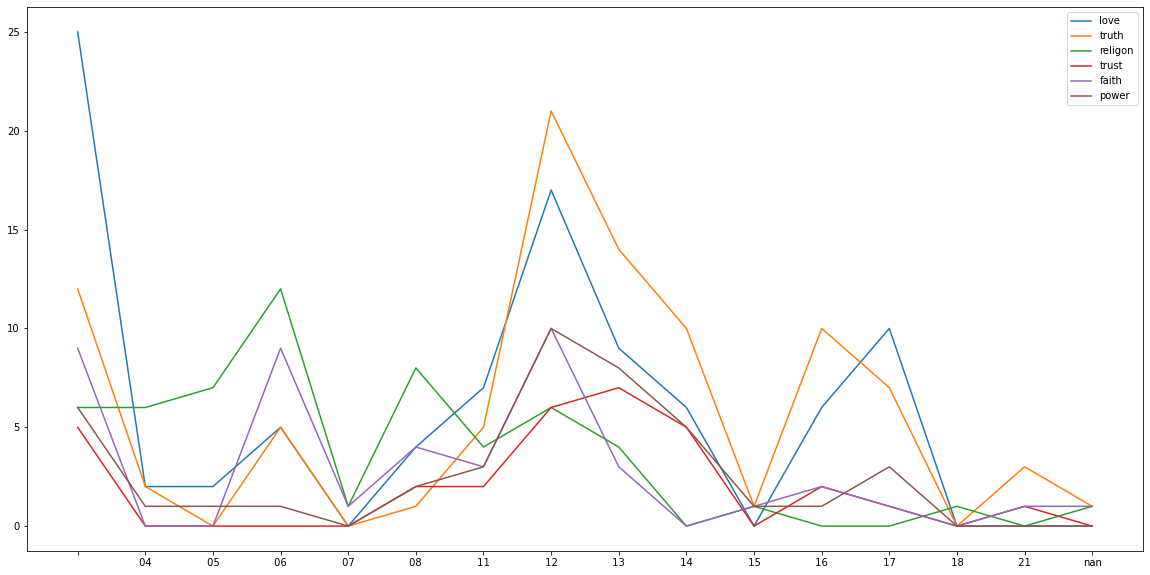

In [47]:
plt.figure(figsize=(20,10))
plt.plot(year_topics['Year'], year_topics['love'], label = 'love')
plt.plot(year_topics['Year'], year_topics['truth'], label = 'truth')
plt.plot(year_topics['Year'], year_topics['religon'], label = 'religon')
plt.plot(year_topics['Year'], year_topics['trust'], label = 'trust')
plt.plot(year_topics['Year'], year_topics['faith'], label = 'faith')
plt.plot(year_topics['Year'], year_topics['power'], label = 'power')
plt.legend()